In [23]:
### Untersuchung der Datensätze aus den Youtube-Trends ###
##### Untersuchung der Merkmale "Likes" & "Dislikes" #####

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aufgabe 4: Korrelationsanalyse der YouTube Daten mit Python
* Suchen sie sich 2 Features (Spalten) aus den Daten aus

In [24]:
# Daten mittels Pandas einlesen
youtube_data = pd.read_parquet('..\..\youtube_trend_videos.parquet')

youtube_data['likes_cleaned'] = youtube_data['likes'].apply(lambda x: x[-1])
youtube_data['dislikes_cleaned'] = youtube_data['dislikes'].apply(lambda x: x[-1])

# Daten von NaN-Werten reinigen
youtube_data = youtube_data.dropna()

# Auswahl relevanter Daten
youtube_data_likesvsdislikes = youtube_data[['channel', 'likes_cleaned', 'dislikes_cleaned']]

# Indexierung der Daten neu vornehmen, da atm Lücken bestehen
youtube_data_likesvsdislikes = youtube_data_likesvsdislikes.reset_index(drop=True)

# Anzeige der im Folgenden genutzten Daten (Top 10 Datensätze nach likes) 
youtube_data_likesvsdislikes.head(10)


,channel,likes_cleaned,dislikes_cleaned
0,Brawl Stars,940030.0,11778.0
1,laserluca,53118.0,590.0
2,Fynn Kliemann,13596.0,81.0
3,Felix von der Laden,19310.0,590.0
4,Marius Angeschrien,17961.0,145.0
5,mathisox,6753.0,65.0
6,Stuttgarter Zeitung & Stuttgarter Nachrichten,4045.0,1238.0
7,EliasN97,83466.0,437.0
8,DAZN Bundesliga,11381.0,206.0
9,Fynn Kliemann,16831.0,198.0


* Führen Sie die Korrelationsanalyse mit dem passenden Algorithmus in Python durch

In [25]:
# Droppen des channelnamen
youtube_data_forDataFrame = youtube_data_likesvsdislikes.drop(['channel'], axis=1)

youtube_data_forDataFrame.head(10)

# Pearson-Korrelation berechnen
korrelationsMatrix = youtube_data_forDataFrame.corr()

# Der Pearson-Korrelationskoeffizient zwischen den Spalten 'Likes' und 'Dislikes' anzeigen
pearsonKoeffizient = korrelationsMatrix.loc['likes_cleaned', 'dislikes_cleaned']

print(f"Pearson-Korrelationskoeffizient zwischen A und B: {pearsonKoeffizient}")

Pearson-Korrelationskoeffizient zwischen A und B: 0.799158828098204


* Plotten Sie das Ergebnis mit einer geeigneten Visualisierung

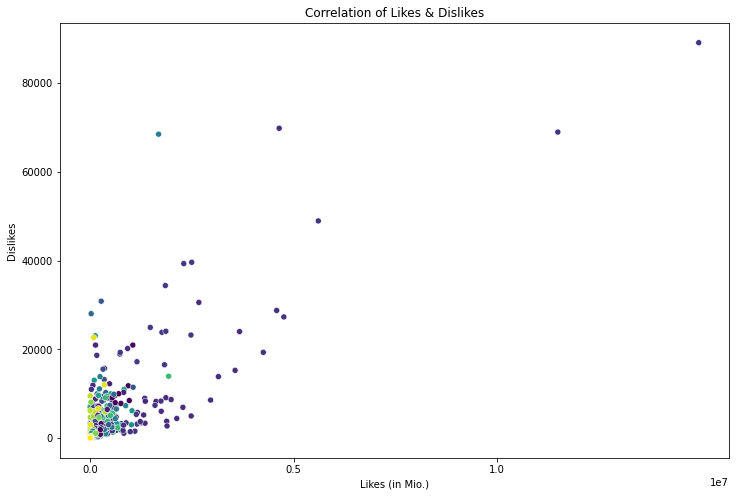

In [26]:
# Visualisierung

plt.figure(figsize=(12, 8))
plt.title('Correlation of Likes & Dislikes')
plt.xlabel('Likes (in Mio.)')
plt.ylabel('Dislikes')

# Step 3: Plot the Dots
sns.scatterplot(x=youtube_data_likesvsdislikes['likes_cleaned'], y=youtube_data_likesvsdislikes['dislikes_cleaned'], hue=youtube_data_likesvsdislikes['channel'], palette='viridis')

# for i, txt in enumerate(youtube_data_likesvsdislikes['channel']):
#     plt.annotate(txt, (youtube_data_likesvsdislikes['likes_cleaned'][i], youtube_data_likesvsdislikes['dislikes_cleaned'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xticks(range(0, int(max(youtube_data_likesvsdislikes['likes_cleaned'])+1), 5000000))
plt.gca().get_legend().remove()

# Show the plot
plt.show()